<a href="https://colab.research.google.com/github/vekoada/tensorflow-course/blob/main/01_neural_network_regression_worked_example.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Insurance Case

In [ ]:
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
#Read in the insurance dataset from link
data_raw = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
data_raw

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
data_encoded = pd.get_dummies(data_raw, columns=['sex', 'smoker', 'region'])
X = data_encoded.drop(labels=['sex_male', 'smoker_no', 'charges'], axis=1)
y = data_raw['charges']
print(len(y))
print(len(X))

1338
1338


In [ ]:
from sklearn.model_selection import train_test_split as tts
X_train, X_test, y_train, y_test = tts(X, y, test_size=0.2)

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=['mae'])
model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 0s 2ms/step - loss: 8550.8916 - mae: 8550.8916
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 7699.2373 - mae: 7699.2373
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 7721.5591 - mae: 7721.5591
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 7414.5640 - mae: 7414.5640
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7532.1924 - mae: 7532.1924
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7662.1636 - mae: 7662.1636
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7371.9453 - mae: 7371.9453
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 7507.1509 - mae: 7507.1509
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 7705.0791 - mae: 7705.0791
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 7663.7676 - mae: 7663.7676

In [ ]:
model.evaluate(X_test, y_test)
y_train.median(), y_train.mean()
#not doing too good - time for improvements

9/9 [==============================] - 0s 6ms/step - loss: 7350.1455 - mae: 7350.1455


(9618.996575000001, 13188.37749712056)

In [ ]:
#2nd model
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_2.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              metrics=['mae'])
history_2 = model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 2s 7ms/step - loss: 12685.4072 - mae: 12685.4072
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 8731.9258 - mae: 8731.9258
Epoch 3/100
34/34 [==============================] - 0s 5ms/step - loss: 7231.4795 - mae: 7231.4795
Epoch 4/100
34/34 [==============================] - 0s 4ms/step - loss: 7098.2212 - mae: 7098.2212
Epoch 5/100
34/34 [==============================] - 0s 3ms/step - loss: 6983.1709 - mae: 6983.1709
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 6857.4907 - mae: 6857.4907
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 6720.6641 - mae: 6720.6641
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 6613.5459 - mae: 6613.5459
Epoch 9/100
34/34 [==============================] - 0s 3ms/step - loss: 6541.6782 - mae: 6541.6782
Epoch 10/100
34/34 [==============================] - 0s 3ms/step - loss: 6517.4727 - mae: 6517.47

In [ ]:
model_2.evaluate(X_test, y_test)
y_train.median(), y_train.mean() #Much better, but looks like the model plateaued

9/9 [==============================] - 0s 2ms/step - loss: 3560.1797 - mae: 3560.1797


(9618.996575000001, 13188.37749712056)

Text(0.5, 0, 'epochs')

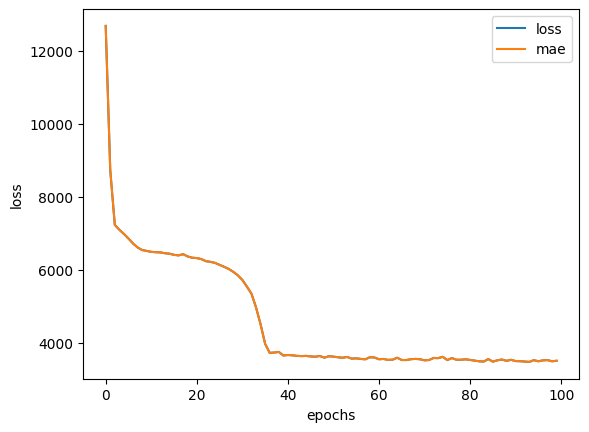

In [ ]:
#Plot the history
pd.DataFrame(history_2.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

### Preprocessing - normalization/standardization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

insurance = pd.read_csv('https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv')
X = insurance.drop('charges', axis=1)
y = insurance['charges']


In [ ]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

#Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ['age', 'bmi', 'children']), #convert these to vals between 0 and 1
    (OneHotEncoder(handle_unknown='ignore'), ['sex', 'smoker', 'region'])
)

#Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

#Fit the column transformer to our training data
ct.fit(X_train)

#Transform training and test data with normalization (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
#Creating the model
model_norm = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(1)
])
model_norm.compile(loss=tf.keras.losses.mae,
                   optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   metrics=['mae'])
history_norm = model_norm.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13342.2412 - mae: 13342.2412
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 13025.6553 - mae: 13025.6553
Epoch 3/100
34/34 [==============================] - 0s 3ms/step - loss: 10963.9521 - mae: 10963.9521
Epoch 4/100
34/34 [==============================] - 0s 2ms/step - loss: 8344.9648 - mae: 8344.9648
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 7910.7598 - mae: 7910.7598
Epoch 6/100
34/34 [==============================] - 0s 2ms/step - loss: 7609.7803 - mae: 7609.7803
Epoch 7/100
34/34 [==============================] - 0s 2ms/step - loss: 7281.2085 - mae: 7281.2085
Epoch 8/100
34/34 [==============================] - 0s 2ms/step - loss: 6861.6968 - mae: 6861.6968
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 6268.2725 - mae: 6268.2725
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 5379.6064 - mae: 537

In [ ]:
model_norm.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 3247.9666 - mae: 3247.9666


[3247.966552734375, 3247.966552734375]

Text(0.5, 0, 'epochs')

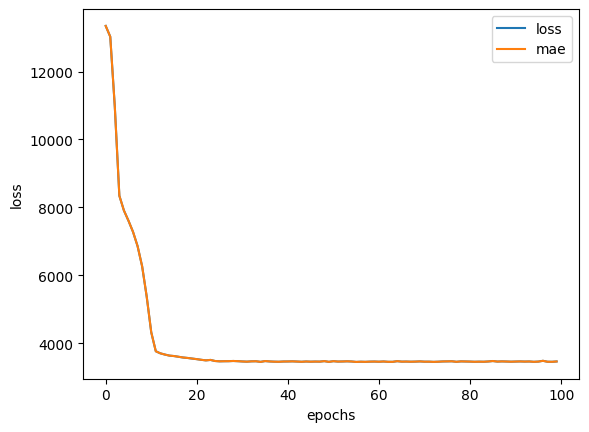

In [ ]:
#Plot the history
pd.DataFrame(history_norm.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")